<a href="https://colab.research.google.com/github/hackinghub2/ML_SEM7_LAB/blob/main/Jatin_Talekar_ML_Lab_Exp-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Jatin Talekar

---

Rollno.: 21102B0055
BE CMPN B

---
Experiment 7 : Graph based Clustering

---
Github : https://github.com/hackinghub2/ML_SEM7_LAB

Facebook dataset loaded successfully.
Number of nodes: 4039
Number of edges: 88234


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 2, Silhouette Score: 0.113


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 3, Silhouette Score: 0.004


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 4, Silhouette Score: 0.009


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 5, Silhouette Score: 0.010


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 6, Silhouette Score: -0.065


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 7, Silhouette Score: -0.058


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 8, Silhouette Score: -0.057


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 9, Silhouette Score: -0.074


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 10, Silhouette Score: -0.072


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 11, Silhouette Score: -0.197


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 12, Silhouette Score: -0.194


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 13, Silhouette Score: -0.188


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 14, Silhouette Score: -0.187


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Number of clusters: 15, Silhouette Score: -0.185
Best number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:310: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Final Silhouette Score: 0.113


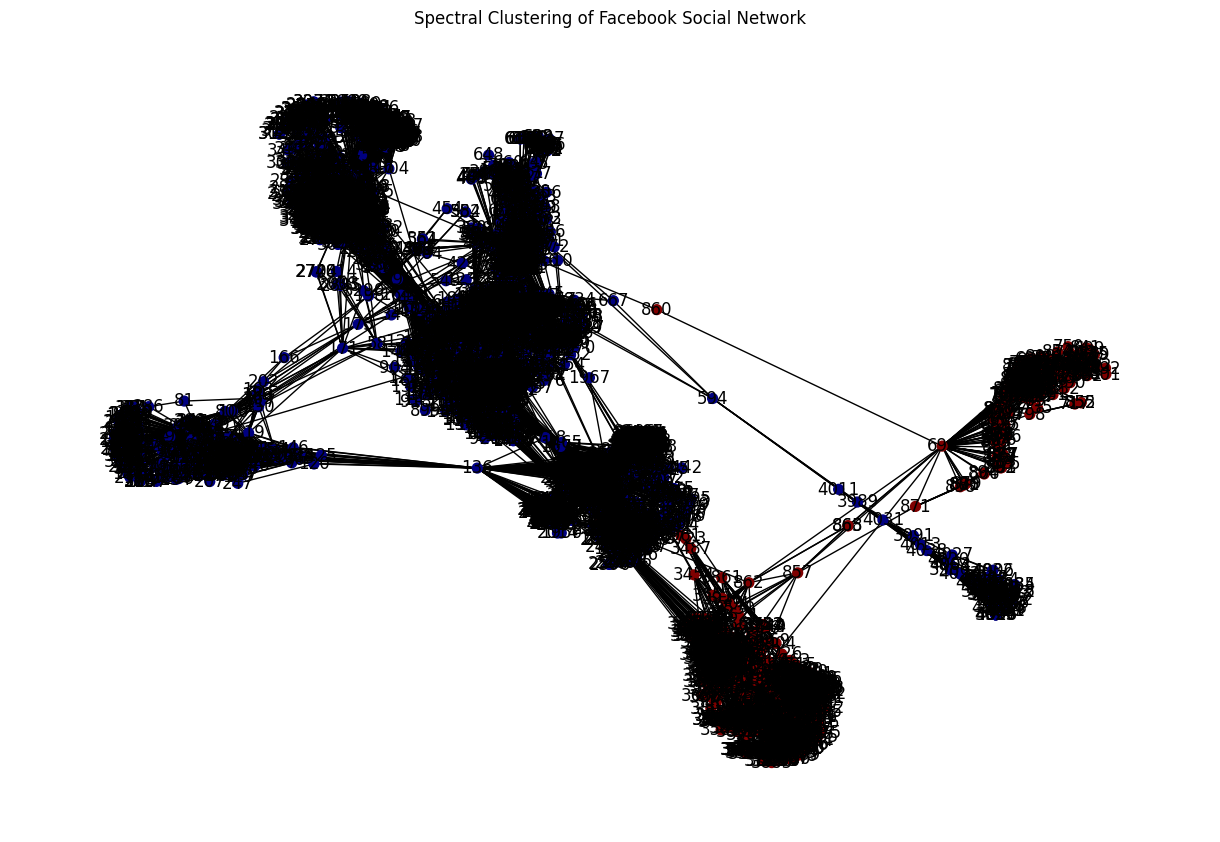

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import requests
import gzip
from io import BytesIO
from sklearn.preprocessing import normalize

def load_facebook_data():
    url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
    print("Downloading and decompressing Facebook dataset...")
    response = requests.get(url)
    with gzip.GzipFile(fileobj=BytesIO(response.content)) as f:
        df = pd.read_csv(f, sep=" ", header=None, names=["source", "target"])
    print("Facebook dataset loaded successfully.")
    return df

# Load the Facebook social network dataset
df = load_facebook_data()

# Create a graph from the dataset
G = nx.from_pandas_edgelist(df, 'source', 'target')

# Check the number of nodes and edges in the graph
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

# Create an adjacency matrix and normalize it
adjacency_matrix = nx.to_numpy_array(G)
adjacency_matrix = normalize(adjacency_matrix, norm='l1', axis=1)

# Function to evaluate different numbers of clusters
def evaluate_clusters(max_clusters):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        spectral_clustering = SpectralClustering(
            n_clusters=n_clusters,
            affinity='precomputed',
            random_state=42,
            n_init=100,
            assign_labels='discretize'
        )
        labels = spectral_clustering.fit_predict(adjacency_matrix)

        if len(set(labels)) > 1:  # Ensure there is more than one cluster
            score = silhouette_score(adjacency_matrix, labels)
            silhouette_scores.append((n_clusters, score))
            print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.3f}')

    return silhouette_scores

# Evaluate clusters
max_clusters = 15  # Adjust the maximum number of clusters to test
silhouette_scores = evaluate_clusters(max_clusters)

# Choose the best number of clusters based on scores
best_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'Best number of clusters: {best_n_clusters}')

# Apply Spectral Clustering with the best number of clusters
spectral_clustering = SpectralClustering(
    n_clusters=best_n_clusters,
    affinity='precomputed',
    random_state=42,
    n_init=100,
    assign_labels='discretize'
)
labels = spectral_clustering.fit_predict(adjacency_matrix)

# Evaluate final clustering using Silhouette Score
silhouette_avg = silhouette_score(adjacency_matrix, labels)
print(f'Final Silhouette Score: {silhouette_avg:.3f}')

# Visualize the clusters
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=labels, with_labels=True, node_size=50, cmap=plt.cm.jet)
plt.title('Spectral Clustering of Facebook Social Network')
plt.show()
